In [4]:
# ! pip uninstall AIEM -y

In [5]:
# ! pip install git+https://github.com/Morteza-Khazaei/AIEM.git

In [6]:
from aiem import AIEM
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

freq:  5.405
theta_i:  30
theta_s:  60
phi_i:  0.0
sigma:  0.00354
cl:  0.0178
eps:  [12.+1.8j]


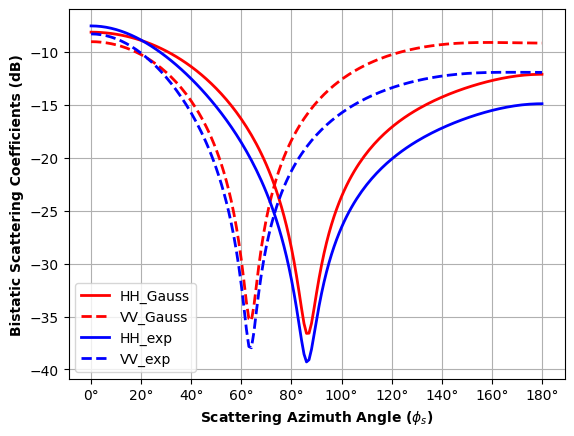

In [8]:
# Parameters for the bistatic case
frq = 5.405
print('freq: ', frq)
itype = ['1', '2']
theta_i = 30  # Fixed incident angle
theta_s = 60  # Fixed scattering angle
phi_s = np.arange(0.000001, 181, 1)  # Scattering azimuth angle from 0 to 180 degrees
print('theta_i: ', theta_i)
print('theta_s: ', theta_s)
phi_i = 0.0
print('phi_i: ', phi_i)
sigma = 0.00354
print('sigma: ', sigma)
cl = 0.0178
print('cl: ', cl)
err = 12
eri = 1.8
eps = np.array([err+eri*1j,], dtype=complex)
print('eps: ', eps)

# Initialize defaultdicts to store the results
HH = defaultdict(list)
VV = defaultdict(list)
HV = defaultdict(list)
VH = defaultdict(list)

# Loop over itype and phi_s values for the bistatic case
for n in itype:
    for phi in phi_s:
        aiem = AIEM(frq_ghz=frq, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi, sigma=sigma, cl=cl, eps=eps, itype=n)
        sigHH, sigVH, sigHV, sigVV = aiem.run()
        HH[n].append(sigHH)
        VV[n].append(sigVV)
        HV[n].append(sigHV)
        VH[n].append(sigVH)

# Plotting results for the bistatic case
plt.figure(2)

# Plotting HH and VV for each itype
plt.plot(phi_s, HH['1'], color='r', linewidth=2, label='HH_Gauss')
plt.plot(phi_s, VV['1'], color='r', linewidth=2, linestyle='--', label='VV_Gauss')
plt.plot(phi_s, HH['2'], color='b', linewidth=2, label='HH_exp')
plt.plot(phi_s, VV['2'], color='b', linestyle='--', linewidth=2, label='VV_exp')

# Customizing plot appearance
plt.grid(True)

plt.xticks(ticks=np.arange(0, 181, 20), labels=['0°', '20°', '40°', '60°', '80°', '100°', '120°', '140°', '160°', '180°'])
plt.xlabel('Scattering Azimuth Angle ($\phi_s$)', fontsize=10, fontweight='bold')
plt.ylabel('Bistatic Scattering Coefficients (dB)', fontsize=10, fontweight='bold')
plt.legend(fontsize=10)
plt.show()

In [1]:
import os
import random
import itertools
from aiem import AIEM
import numpy as np
import matplotlib.pyplot as plt



fname = r'LC08_032032_20220912_eps_5.3GHz'
base_path = r'/mnt/d/PhD source code/datasets'
input_path = os.path.join(base_path, 'outputs')
# output_path = os.path.join(base_path, 'outputs')
infile = os.path.join(input_path, fname + '.npz')
# outfile = os.path.join(output_path, oname + '.npz')

# Load Array
dictData = np.load(infile)
stack = dictData['arr_0']

# Print the array
nsize, xsize, ysize = stack.shape
print(nsize, xsize, ysize)

frq = 5.3
itype = ['2',]
theta_i = np.arange(5, 85, 5)
theta_s = np.arange(5, 85, 5)
phi_i = np.arange(5, 185, 5)
phi_s = np.arange(5, 185, 5)
sigma = np.arange(0.001, 0.05, 0.005)
print(sigma)
cl = np.arange(0.001, 0.1, 0.005)
print(cl)

# to compute all possible permutations
permutation = list(itertools.product(*[theta_i, theta_s, phi_i, phi_s, sigma, cl]))
print(len(permutation))

bnames = ['HH', 'VH', 'HV', 'VV']
id_eps = random.randint(0, nsize)
print(id_eps)
id_per = random.randint(0, len(permutation))
print(id_per)

er = stack[id_eps]
p = permutation[id_per]
sig = AIEM(frq_ghz=frq, theta_i=p[0], theta_s=p[1], phi_i=p[2], phi_s=p[3], sigma=p[4], cl=p[5], eps=er, itype='2').run()

# Plot the SOM band
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axs.ravel()):
    im = ax.imshow(sig[i], cmap='Spectral_r')
    ax.set_title(rf'$\sigma_{{{bnames[i]}}}$', fontsize=10)
    fig.colorbar(im, ax=ax)

fig.suptitle(rf'$\theta_i={p[0]}; \theta_s={p[1]}; \phi_i={p[2]}; \phi_s={p[3]}$')
fig.tight_layout()
plt.show()

10000 64 64
[0.001 0.006 0.011 0.016 0.021 0.026 0.031 0.036 0.041 0.046]
[0.001 0.006 0.011 0.016 0.021 0.026 0.031 0.036 0.041 0.046 0.051 0.056
 0.061 0.066 0.071 0.076 0.081 0.086 0.091 0.096]


: 